In [31]:
import pandas as pd
import numpy as np
from numpy import nan,shape
%pylab inline
print 'pandas version: ',pd.__version__
print 'numpy version:',np.__version__
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib
pandas version:  0.18.1
numpy version: 1.11.0


`%matplotlib` prevents importing * from pylab and numpy


In [32]:
# read information about the stations
import pickle
Data_dir='../../Data/Weather'
#stations=pickle.load(open(Data_dir+'/stations.pkl','r'))
data = pickle.load(open("stations_projections.pickle",'r'))

In [33]:
# break up the lists of coefficients separate columns
for col in [u'TAVG_coeff', u'TRANGE_coeff', u'SNWD_coeff']:
    for i in range(3):
        new_col=col+str(i+1)
        data[new_col]=[e[i] for e in list(data[col])]
    data.drop(labels=col,axis=1,inplace=True)
data.drop(labels='station',axis=1,inplace=True)
data.head(1)

latitude  longitude  elevation  dist_coast  TAVG_coeff1  TAVG_coeff2  \
0   36.0042    -119.96       73.2     107.655  3047.962363   1974.34852   

   TAVG_coeff3  TRANGE_coeff1  TRANGE_coeff2  TRANGE_coeff3  SNWD_coeff1  \
0   150.560792   -2903.632879    -236.907268     147.021791     0.191503   

   SNWD_coeff2  SNWD_coeff3  
0     0.187263    -0.040138

#### Generate 2 other random fields besides elevation for plotting

### Finally we have 3 values of each station: elev, dim2 and dim3
Using HSV representation for each station

In [34]:
import math

def hsv2rgb(h, s, v):
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = math.floor(h60)
    hi = int(h60f) % 6
    f = h60 - h60f
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    r, g, b = 0, 0, 0
    if hi == 0: r, g, b = v, t, p
    elif hi == 1: r, g, b = q, v, p
    elif hi == 2: r, g, b = p, v, t
    elif hi == 3: r, g, b = p, q, v
    elif hi == 4: r, g, b = t, p, v
    elif hi == 5: r, g, b = v, p, q
    r, g, b = int(r * 255), int(g * 255), int(b * 255)
    return "#%02x%02x%02x" % (r,g,b)

In [35]:
# Returns array with all elements between [0,1]
def normalize_array(array):
    array = np.array(array)
    array = array + abs(array.min())
    array = array * 1.0 / array.max()
    return array

In [36]:
# Takes the array vectors for each station and returns the corresponding RGB colors values for all stations
def get_colors(dim1, dim2, dim3):
    H = normalize_array(dim1) * 360 # varies from 0 to 360
    S = normalize_array(dim2) # varies from 0 to 1. Purity of color
    V = normalize_array(dim2) # varies from 0 to 1. Brightness of color
    colors = []
    for (h,s,v) in zip(H,S,V):
        colors.append(hsv2rgb(h,s,v))
    return colors
        

In [37]:
#this code is using pandas dataframes
lons=data.ix[:,'longitude'].values
lats=data.ix[:,'latitude'].values
station_names=data.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
#elev=[min(3000,max(e,0))/3000. for e in elev]
print len(lons),len(lats),len(station_names)

12140
12140 12140 12140


In [38]:
dim2 = np.random.randint(-10, high=10, size=len(lons))
dim3 = np.random.randint(-100, high=100, size=len(lons))

4707.08123232 -2875.58101164
12140


(array([ 129.,   47.,   33.,   50.,   60.,   57.,   76.,   70.,   90.,
          95.,  107.,  122.,  120.,  123.,  134.,  163.,  178.,  188.,
         191.,  196.,  213.,  225.,  250.,  232.,  223.,  222.,  224.,
         228.,  233.,  209.,  219.,  244.,  254.,  238.,  223.,  257.,
         214.,  233.,  213.,  222.,  183.,  200.,  196.,  181.,  193.,
         161.,  179.,  148.,  136.,  141.,  127.,  134.,  147.,  135.,
         131.,  122.,  140.,  147.,  135.,  142.,  148.,  141.,  129.,
         140.,  126.,  110.,  115.,  121.,  107.,   93.,   95.,   82.,
          64.,   77.,   75.,   65.,   68.,   50.,   51.,   43.,   35.,
          40.,   29.,   32.,   24.,   27.,   33.,   23.,   26.,   13.,
          10.,   12.,   15.,    7.,   10.,    6.,    2.,    6.,    4.,    3.]),
 array([    0.,    47.,    94.,   141.,   188.,   235.,   282.,   329.,
          376.,   423.,   470.,   517.,   564.,   611.,   658.,   705.,
          752.,   799.,   846.,   893.,   940.,   987.,  1034.,  1

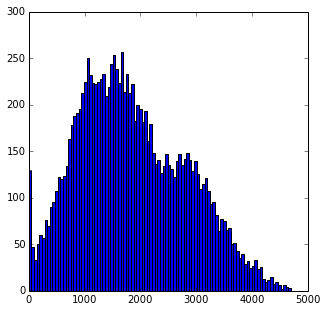

In [39]:
##TAVG_coeff1##
elev=data.ix[:,'TAVG_coeff1'].values
elev=elev[select]
print elev.max(),elev.min()
elev=[min(4700,max(e,0)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

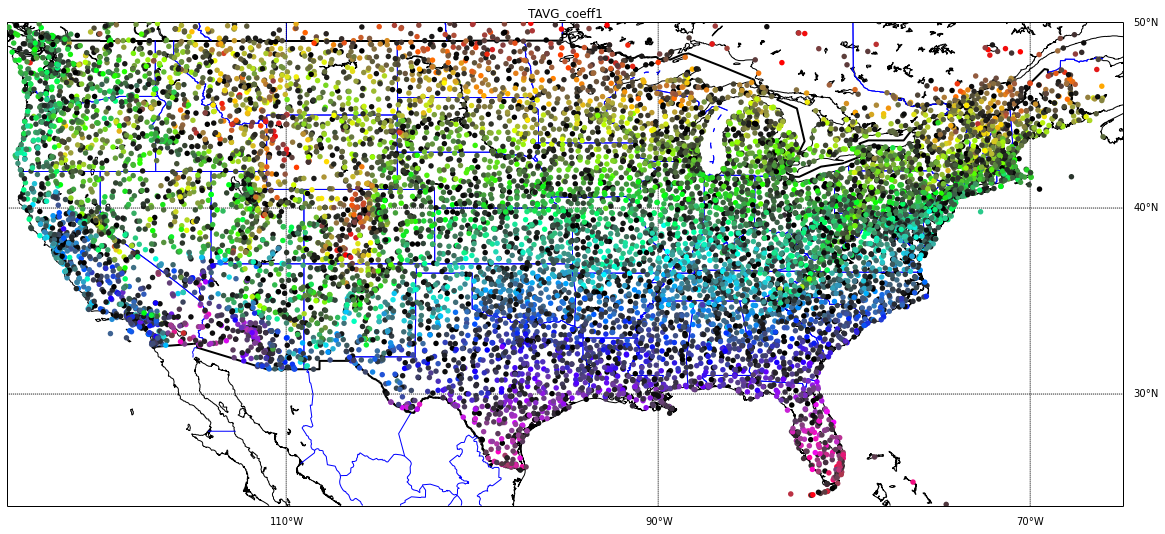

In [40]:
## Map plot for TAVG_coeff1 ##
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('TAVG_coeff1')
plt.show()


4877.31188495 589.041143204
12140


(array([ 101.,   12.,    4.,   11.,    4.,    7.,   11.,   10.,   15.,
          12.,   15.,   11.,   14.,   21.,   17.,   17.,   31.,   32.,
          32.,   29.,   28.,   36.,   39.,   42.,   26.,   28.,   41.,
          35.,   50.,   44.,   59.,   47.,   44.,   59.,   52.,   66.,
          58.,   57.,   65.,   68.,   63.,   69.,   85.,   67.,   72.,
         105.,  103.,   99.,   89.,  106.,  103.,  134.,  131.,  156.,
         133.,  190.,  178.,  175.,  260.,  261.,  280.,  314.,  321.,
         378.,  427.,  386.,  388.,  368.,  381.,  353.,  337.,  314.,
         300.,  268.,  251.,  264.,  216.,  198.,  202.,  172.,  190.,
         162.,  167.,  175.,  162.,  143.,  134.,  128.,  115.,   95.,
          94.,   94.,  102.,   63.,   64.,   40.,   35.,   38.,   29.,   63.]),
 array([ 1000.,  1015.,  1030.,  1045.,  1060.,  1075.,  1090.,  1105.,
         1120.,  1135.,  1150.,  1165.,  1180.,  1195.,  1210.,  1225.,
         1240.,  1255.,  1270.,  1285.,  1300.,  1315.,  1330.,  1

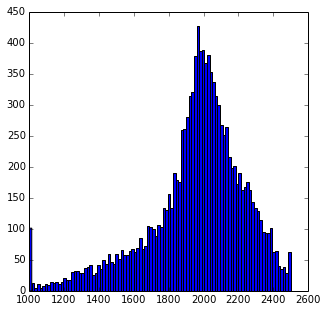

In [41]:
##TAVG_coeff2##
elev=data.ix[:,'TAVG_coeff2'].values
elev=elev[select]
print elev.max(),elev.min()
elev=[min(2500,max(e,1000)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

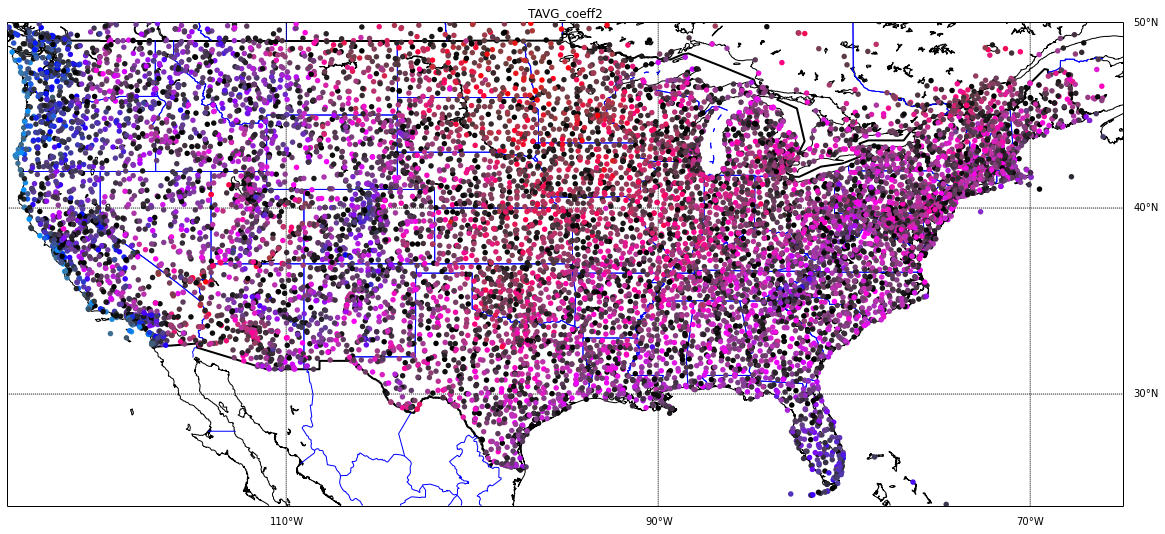

In [42]:
## Map plot for TAVG_coeff2 ##
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('TAVG_coeff2')
plt.show()


648.018285551 -331.771553739
12140


(array([  46.,    7.,   15.,   10.,   13.,    9.,   18.,   20.,   19.,
          33.,   29.,   26.,   32.,   54.,   52.,   50.,   63.,   87.,
         108.,  105.,   91.,  100.,   95.,  107.,  125.,  129.,  129.,
         116.,  119.,  104.,  118.,  131.,  119.,  124.,  118.,  121.,
         136.,  133.,  120.,  131.,  146.,  162.,  182.,  186.,  194.,
         189.,  203.,  243.,  239.,  273.,  268.,  310.,  284.,  323.,
         295.,  315.,  300.,  269.,  296.,  259.,  251.,  248.,  172.,
         214.,  194.,  173.,  194.,  199.,  176.,  162.,  170.,  131.,
         128.,  119.,  117.,  114.,  103.,   90.,   88.,   92.,   82.,
          78.,   97.,   62.,   50.,   57.,   53.,   46.,   39.,   54.,
          40.,   32.,   39.,   25.,   19.,   10.,   11.,   11.,   10.,   92.]),
 array([   0. ,    4.5,    9. ,   13.5,   18. ,   22.5,   27. ,   31.5,
          36. ,   40.5,   45. ,   49.5,   54. ,   58.5,   63. ,   67.5,
          72. ,   76.5,   81. ,   85.5,   90. ,   94.5,   99. ,  1

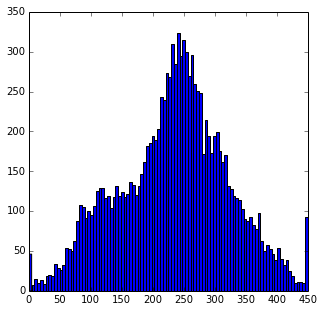

In [44]:

##TAVG_coeff3##
elev=data.ix[:,'TAVG_coeff3'].values
elev=elev[select]
print elev.max(),elev.min()
elev=[min(450,max(e+150,0)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

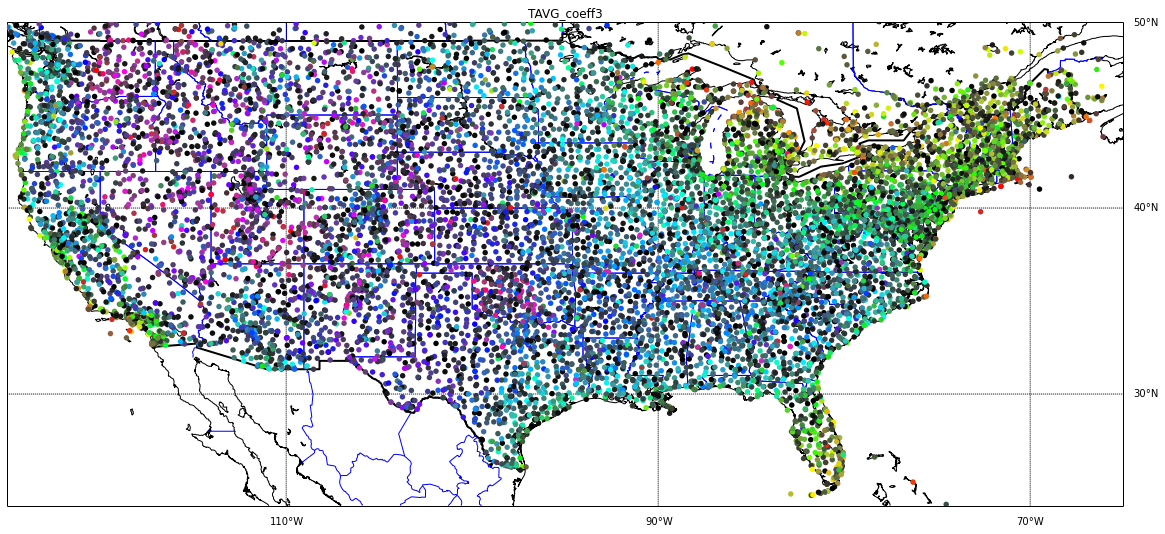

In [45]:
## Map plot for TAVG_coeff3 ##
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('TAVG_coeff3')
plt.show()


[-2903.63287861 -1588.34406546 -2802.63818721 ..., -2796.68843371
 -2457.74663993 -2464.4630342 ]
-799.773224052 -7448.81151247
12140


(array([  45.,   14.,   12.,   12.,   14.,   22.,   24.,   37.,   17.,
          38.,   42.,   43.,   30.,   63.,   45.,   65.,   56.,   67.,
          84.,   68.,   77.,   79.,   84.,   82.,   96.,  103.,  108.,
          98.,  131.,  120.,  141.,  134.,  119.,  120.,  129.,  136.,
         139.,  153.,  151.,  138.,  194.,  168.,  192.,  196.,  241.,
         268.,  293.,  316.,  289.,  347.,  379.,  378.,  367.,  417.,
         384.,  387.,  387.,  344.,  343.,  319.,  288.,  232.,  219.,
         182.,  189.,  171.,  156.,  152.,  120.,  124.,  113.,   71.,
          79.,   79.,   76.,   73.,   64.,   51.,   45.,   50.,   33.,
          30.,   19.,   20.,   25.,   16.,   22.,   17.,    9.,   11.,
           4.,   10.,    6.,    6.,    2.,    8.,    2.,    7.,    0.,   14.]),
 array([    0.,    30.,    60.,    90.,   120.,   150.,   180.,   210.,
          240.,   270.,   300.,   330.,   360.,   390.,   420.,   450.,
          480.,   510.,   540.,   570.,   600.,   630.,   660.,   

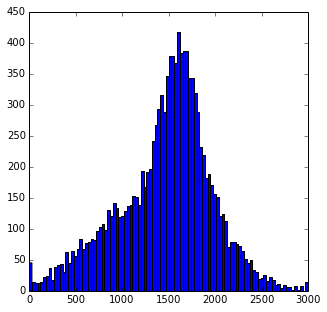

In [46]:
##TRANGE_coeff1##
data['TRANGE_coeff1'].fillna(0, inplace=True)
elev=data.ix[:,'TRANGE_coeff1'].values
elev=elev[select]
print elev
elev[np.isnan(elev)] = 0.
print elev.max(),elev.min()
elev=[min(3000,max(e+4000,0)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

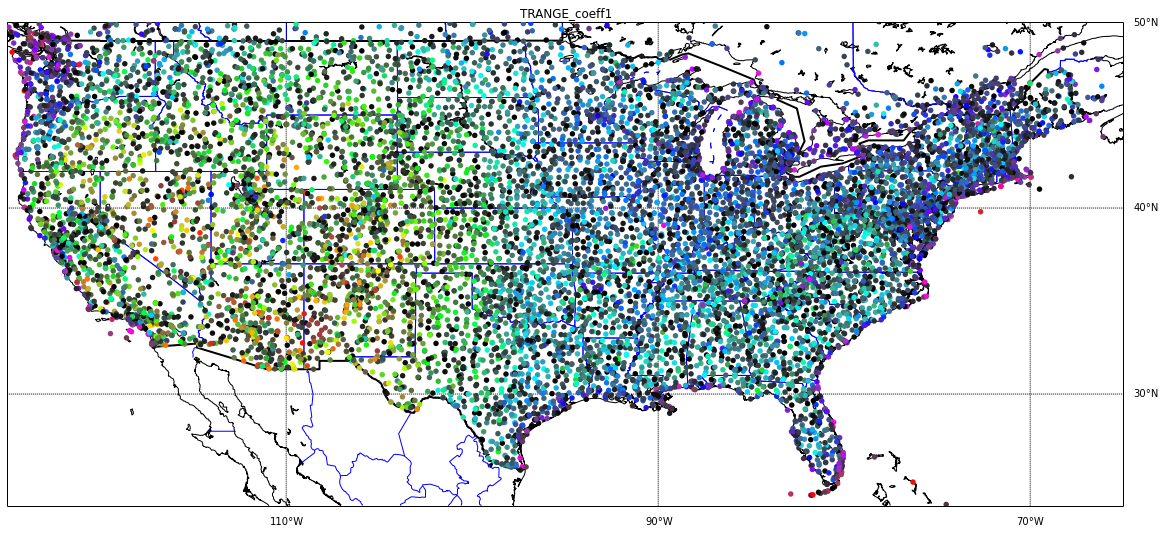

In [47]:
## Map plot for TRANGE_coeff1 ##
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('TRANGE_coeff1')
plt.show()


666.121482816 -1790.31408052
12140


(array([  32.,    5.,    8.,    7.,    9.,   12.,   17.,   14.,   22.,
          23.,   23.,   28.,   24.,   33.,   28.,   29.,   34.,   30.,
          48.,   42.,   48.,   60.,   64.,   50.,   49.,   52.,   56.,
          60.,   64.,   52.,   61.,   62.,   55.,   59.,   51.,   70.,
          64.,   76.,   57.,   59.,   86.,   96.,  106.,  110.,  122.,
         152.,  168.,  214.,  232.,  241.,  248.,  258.,  272.,  290.,
         330.,  340.,  373.,  327.,  286.,  318.,  303.,  290.,  277.,
         258.,  239.,  262.,  276.,  226.,  255.,  234.,  225.,  256.,
         238.,  227.,  234.,  233.,  224.,  196.,  184.,  168.,  161.,
         137.,  124.,  122.,  106.,   94.,   83.,   60.,   44.,   32.,
          29.,   30.,   16.,   22.,   15.,    7.,   13.,    6.,    6.,   22.]),
 array([    0.,    13.,    26.,    39.,    52.,    65.,    78.,    91.,
          104.,   117.,   130.,   143.,   156.,   169.,   182.,   195.,
          208.,   221.,   234.,   247.,   260.,   273.,   286.,   

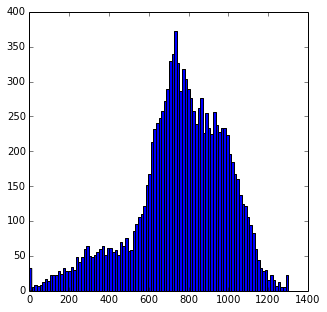

In [48]:
##TRANGE_coeff2##
elev=data.ix[:,'TRANGE_coeff2'].values
elev=elev[select]
print elev.max(),elev.min()
elev=[min(1300,max(e+790,0)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

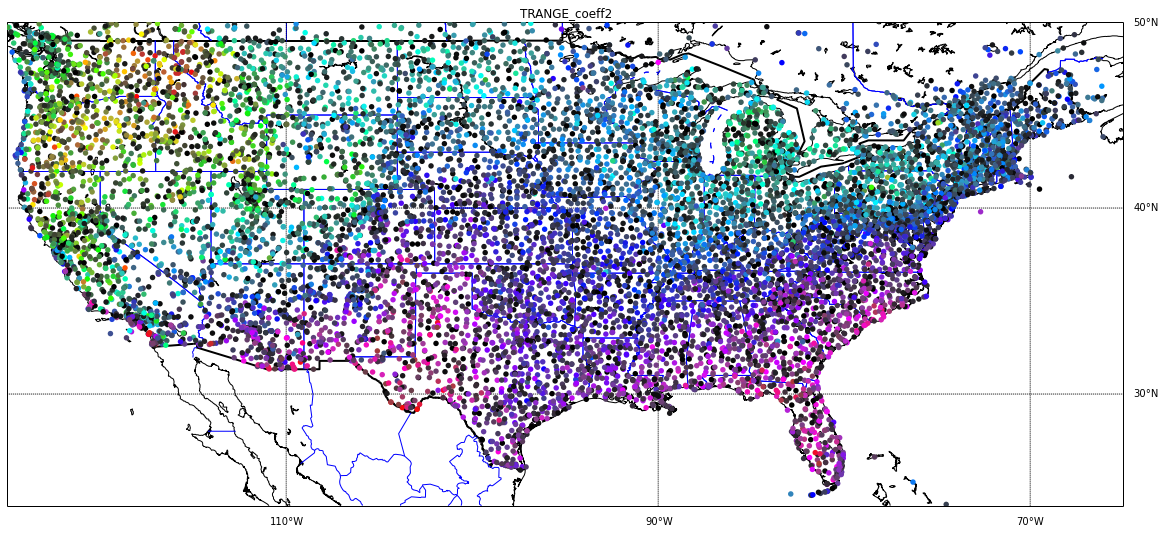

In [49]:
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('TRANGE_coeff2')
plt.show()

45800.8402712 0.0
12140


(array([  4.79200000e+03,   1.10800000e+03,   7.50000000e+02,
          5.89000000e+02,   4.43000000e+02,   3.63000000e+02,
          2.86000000e+02,   2.69000000e+02,   2.32000000e+02,
          2.30000000e+02,   1.87000000e+02,   1.72000000e+02,
          1.52000000e+02,   1.54000000e+02,   1.33000000e+02,
          1.47000000e+02,   1.08000000e+02,   1.03000000e+02,
          8.30000000e+01,   8.60000000e+01,   8.20000000e+01,
          7.60000000e+01,   7.70000000e+01,   5.90000000e+01,
          6.20000000e+01,   5.20000000e+01,   6.50000000e+01,
          5.80000000e+01,   3.90000000e+01,   4.60000000e+01,
          4.20000000e+01,   4.80000000e+01,   3.90000000e+01,
          4.40000000e+01,   4.80000000e+01,   2.20000000e+01,
          3.10000000e+01,   1.80000000e+01,   3.20000000e+01,
          2.60000000e+01,   3.10000000e+01,   3.30000000e+01,
          2.80000000e+01,   2.30000000e+01,   2.20000000e+01,
          1.50000000e+01,   3.00000000e+01,   1.80000000e+01,
        

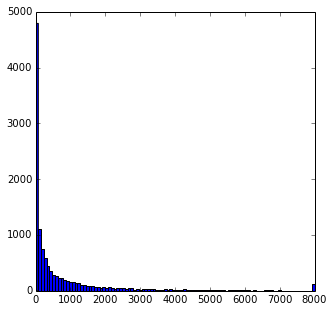

In [50]:
##SNWD_coeff1##
elev=data.ix[:,'SNWD_coeff1'].values
elev=elev[select]
print elev.max(),elev.min()
elev=[min(8000,max(e,0.)) for e in elev]
print len(elev)
colors = get_colors(elev,dim2,dim3)
figure(figsize=(5,5))
plt.hist(elev,bins=100)

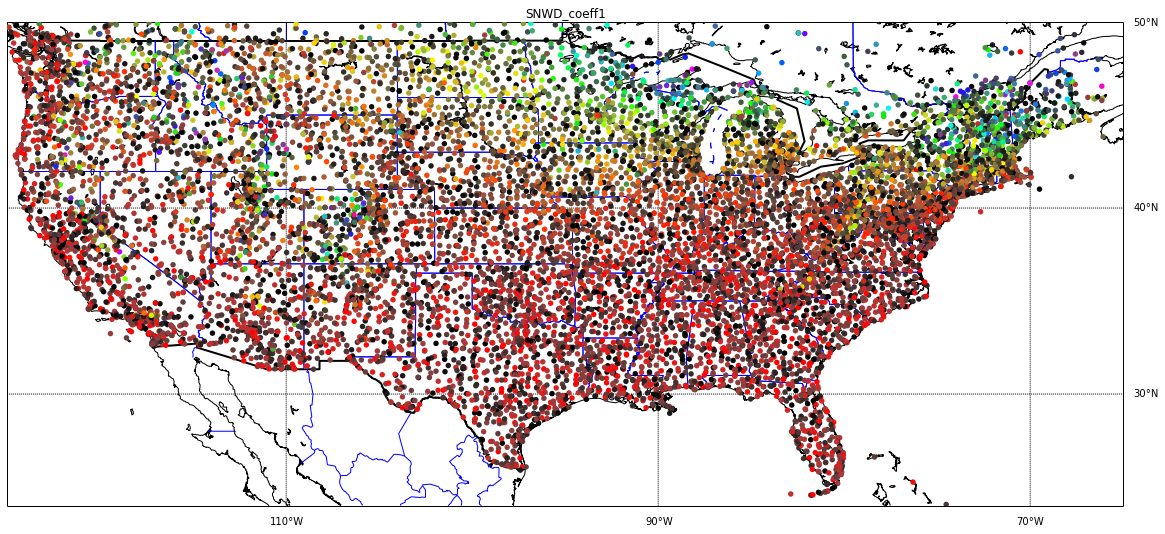

In [51]:
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
#z=np.array(elev)*99
#print shape(x),shape(y),shape(z)
m.scatter(x,y,30,colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('SNWD_coeff1')
plt.show()